# Un exemple de système chaotique
Une des particularités d'un système chaotique est de présenter une sensibilité extrême à ses conditions initiales. Cela signifie qu'une
perturbation, aussi faible soit-elle, sur la condition initiale d'un système dynamique aura une conséquence importante sur son évolution
temporelle. C'est ce comportement que l'on va illustrer dans ce notebook.

Pour être précis, nous parlons ici de chaos déterministe, c'est-à-dire du comportement chaotique d'un système dynamique dont les équations
du mouvement sont déterministes : pour une même condition initiale idéale, le système évoluera toujours de la même manière. L'évolution chaotique
d'un système ne tient donc pas à la complexité des équations, la multiplicité des variables, ou encore à l'introduction de paramètres
définis de manière aléatoire, mais bien à la sensibilité extrême aux conditions initiales.

Le système chaotique le plus largement connu est l'équation logistique. C'est une équation extrêmement simple... même si l'apparition d'un
comportement chaotique ne peut résulter que de non-linéarités. Cette équation est celle qui régit l'évolution d'une population,
par exemple celle de certains poissons. Leur reproduction conduit à faire croître leur nombre, mais la quantité limitée de nourriture va
limiter cette croissance.

## Présentation mathématique du problème
On suppose que cette dynamique décrit correctement une population de lapins. On note $n_i$ la population de lapins l'année $i$, et $\alpha$ le nombre de petits par portée (une par an). Alors, $n_{i+1} = \alpha n_i$. Si $\alpha$ est une constante, alors, on obtiendra l'année $p$

$$ n_p = \alpha^p n_0 $$

c'est-à-dire une croissance exponentielle de la population de lapins.

Mais la quantité finie de ressources ainsi que les prédateurs va limiter cette croissance séculaire. Cela se traduit mathématiquement par le fait que $\alpha$ ne puisse plus être une constante, mais est une fonction de $n_i$ ainsi que d'autres paramètres. Si l'on note $r$ le taux de croissance maximal et $n_{\max}$ le nombre maximal de lapins qu'il peut exister (en consommant donc toutes les ressources), alors le coefficient $\alpha$ pourrait s'écrire

$$ \alpha = r \left( 1 - \frac{n_i}{n_{\max}} \right) $$

La forme de l'équation d'évolution de la population devient alors

$$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $$

et peut se réécrire avec la nouvelle variable $x_i = n_i / n_{\max}$

$$ x_{i+1} = r (1-x_i)x_i $$

que l'on appelle « l'équation logistique ». Pour l'étude de cette équation, on introduit la fonction

$$ f(x) = r (1-x) x $$

dont le seul paramètre est donc $r$. Nous allons voir que suivant les valeurs de $r$, le comportement asymptotique de la suite

$$ x_{i+1} = f(x_i) $$

présente un comportement chaotique. $r$ est compris entre 1 et 4.

## Comportement de la suite
Comme expliqué dans le cours *Représentation graphique d'une suite mathématique*, représenter de façon graphique le comportement de la suite
pour $r=2.5$ et $x_0=0.1$. La suite tend-elle vers une limite finie ?

Choisir d'autres valeurs de $r$ comprises entre 2.5 et 4. Que constatez-vous ?

Text(0.5, 1.0, 'Graphe du comportement de la population de lapins')

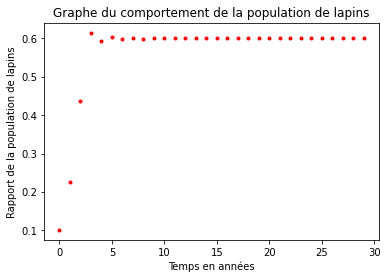

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(r, X) :             #définition de notre fonction
    """fonction d'équation logistique"""
    return r*(1-X)*X      #retourne la valeur de x[i+1] en fonction de x[i]

 #On définit les valeurs de nos paramètres 
r=2.5
N=30

 #On créé deux tableaux
Ent = np.arange(N)          #Ce tableau nous donnes les 30 premiers entiers pour notre abcisse
X = np.empty(N)            #Ce tableau enregistre les 30 valeurs de notre suite X
X[0]=0.1                   #Initialisation de X avec la valeur de l'énoncé 


 #On créé une fonction dépendant de l'équation logistique et de notre paramètre N
for i in range(N-1) : 
    X[i+1] = f(r, X[i])
    
   
 #On trace notre graphique 
plt.plot(Ent, X, 'r.')
plt.xlabel("Temps en années")
plt.ylabel("Rapport de la population de lapins")
plt.title("Graphe du comportement de la population de lapins")

# <font color='grey'>On remarque que pour d'autres valeurs que 2.5 pour r, la suite ne tend plus toujours vers une seule limite fini. </font>

## Diagramme de bifurcation
On souhaite dans cette partie étudier la limite (lorsqu'elle existe) de la suite des $x_i$ définie par l'équation logistique, de
façon systématique. Plus précisément, on souhaite étudier la manière dont cette limite dépend de la valeur de $r$.

Pour cela, vous allez prendre un grand nombre de valeurs de $r$ comprises entre 2.5 et 4, mais toujours $x_0=0.00001$. Pour
chaque valeur de $r$, calculez les 1000 premiers termes de la suite, et gardez uniquement les 100 derniers termes. Si la limite est
bien définie, ces 100 derniers termes devraient être très semblables, ce qui n'est pas toujours le cas.

Vous allez créer un diagramme de bifurcation. Pour cela il faut tracer sur un graphique :

- pour une valeur de $r$ donnée en abscisses, tracer les 100 derniers termes de la suite en ordonnée (avec des petits points)
- répéter cette opération pour toutes les valeurs de $r$ choisies

Vous devriez obtenir un diagramme qui ressemble à :

![title](./diagramme_bifurcation.png)

Que pouvez-vous en conclure sur la manière dont la limite de l'équation logistique dépend du paramètre $r$ ? Est-ce que le diagramme
de bifurcation dépend de la valeur de $x_0$ ?

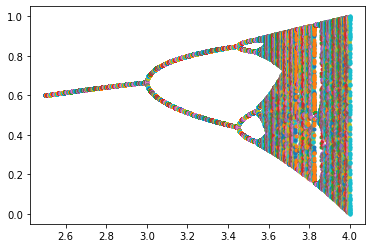

In [2]:
#On reprend le code précédent
import numpy as np
import matplotlib.pyplot as plt

def f(r, X) :         
    """fonction d'équation logistique"""
    return r*(1-X)*X    

r=np.linspace(2.5, 4, 500)
N=501
Ent = np.arange(N)    
X = np.empty(N)   
X[0]=0.000001

# Nouvelle partie du code 
for r in np.linspace(2.5, 4, 500) : # On définit un 500 valeurs de r 
    for i in range(N-1) :           # On applique la fonction à nos 500 valeurs 
        X[i+1] = f(r, X[i])
        xr= X[401:]                 # On conserve les 100 derniers termes de la suite
    tr= r+np.zeros(100)             # On conserve 100 valeurs de r dans un tableau
    plt.plot(tr, xr, '.')           # On trace le graphe

# <font color='grey'>On en conclut que la limite de l'équation dépend complétement de r. Le diagramme de bifurcation lui ne dépende </font>

## Exposant de Lyapunov
Nous avons dit plus haut que le caractère chaotique d'un système dynamique tient à la manière dont une différence, aussi petite soit-elle,
sur deux conditions initiales va pouvoir conduire à une divergence sévère de leur comportement asymptotique. Mathématiquement, cela
signifie que la distance entre ces deux solutions va augmenter de manière exponentielle.

On cherche une forme en

$$ e^{t \lambda(r)} $$

de cette croissance, sachant qu'elle va dépendre de la valeur de $r$. Lorsque $\lambda$ est une fonction à valeur négative, la
suite associée à l'équation logistique est convergente. À l'inverse, pour les valeurs positives de $\lambda$, la suite diverge.
Cette divergence peut se traduire de plusieurs manières. Comme vous l'avez vu sur le diagramme de bifurcation, suivant les valeurs de
$r$, on peut avoir 1, 2, 4 ou plus limites à la suite des $x_i$.

La manière de calculer cet exposant est due à Aleksander Lyapunov (1857-1918). L'expression de $\lambda(r)$ est

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

Vous allez calculer pour chacune des valeurs de $r$ uniformément distribuées entre 2.5 et 4 la valeur de l'exposant de Lyapunov.
Sur un graphique, vous tracerez un point pour chacun des couples $(r, \lambda)$ que vous avez obtenu. Pour rendre le graphique plus
lisible, vous pourrez tracer un point noir lorsque $\lambda < 0$ et un point rouge lorsque $\lambda > 0$. Vous pourrez aussi
tracer sur votre graphique une ligne horizontale bleue pour $\lambda = 0$ pour marquer la différence entre les valeurs stables et
instables de $\lambda$.

Vous devriez obtenir un graphique qui ressemble à :

![title](./lyapunov.png)

Comparez ce graphique au diagramme de bifurcation. Que pouvez-vous en conclure sur la stabilité de l'équation logistique ?

/tmp/ipykernel_3936/3043733141.py:20: RuntimeWarning: divide by zero encountered in divide
  λ=(1/(Ent)) * np.sum(np.log(abs(r*(1-2*X))))   # On définit le coefficient lamba


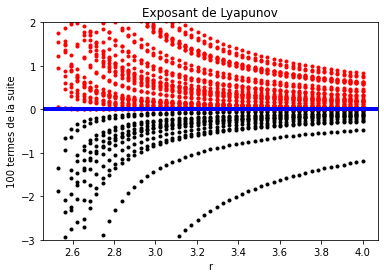

In [3]:
# On reprend notre code précédent
import numpy as np
import matplotlib.pyplot as plt

def f(r, X) :             
    """fonction d'équation logistique"""
    return r*(1-X)*X

rp=np.linspace(2.5, 4, 50)
N=50
Ent = np.arange(N)          
X = np.empty(N)            
X[0]=0.000001

# Nouvelle partie du code 

for r in np.linspace(2.5, 4, 50) : #On définit 500 valeurs de r dans notre intervalle
    for i in range(N-1) : 
        X[i+1] = f(r, X[i])                        # On calcule notre fonction avec nos r valeurs N fois
    λ=(1/(Ent)) * np.sum(np.log(abs(r*(1-2*X))))   # On définit le coefficient lamba 
    if np.all(λ < 0) :
        plt.plot(rp, λ, '.', color='black')        # On trace les points pour λ négatif
    else :
        plt.plot(rp, λ, '.', color='red')          # On trace les points pour λ positif
    plt.axhline(linewidth=4, color='b')            # On trace l'axe des y=0 en bleu
    plt.ylim(-3, 2)                                # On conserve le graphe pour y compris entre -3 et 2
    plt.xlabel("r")
    plt.ylabel("100 termes de la suite")
    plt.title("Exposant de Lyapunov")

## Compte-rendu
Vous rendrez un compte-rendu sous la forme d'un Jupyter Notebook (et d'une partie rédigée à la main si vous le souhaitez).
Vous apporterez un soin particulier à la rédaction, à l'explication de la résolution du problème, et à l'explication du script (code commenté).

Vous rendrez votre compte-rendu dans l'activité devoir correspondante de Moodle. Si votre compte-rendu
comporte une partie rédigée à la main, vous devrez la scanner (par exemple avec une application de votre téléphone
intelligent) et la rendre sous format pdf, en plus de votre Jupyter Notebook, dans Moodle.